In [ ]:
import pandas as pd


df = pd.read_csv("PL11.csv")

df = df[['HomeTeam','AwayTeam','Date','BbAvH','BbAvD','BbAvA','FTR', "AwayTeamGoals", "HomeTeamConceded", "AwayTeamConceded", "HomeTeamGoals"]]

df["Date"] = pd.to_datetime(df["Date"])
df["Weekday"] = df['Date'].dt.weekday
df["Month"] = df['Date'].dt.month
df["Year"] = df['Date'].dt.year

df.drop(columns=["Date"], inplace= True)

df["Prob_H"] = 1 / df["BbAvH"]
df["Prob_D"] = 1 / df["BbAvD"]
df["Prob_A"] = 1 / df["BbAvA"]

total = df["Prob_H"] + df["Prob_D"] + df["Prob_A"]
df["Prob_H"] /= total
df["Prob_D"] /= total
df["Prob_A"] /= total


df.to_csv("PL11_2.csv")

print(df.head())

     HomeTeam     AwayTeam  BbAvH  BbAvD  BbAvA FTR  AwayTeamGoals  \
0     Arsenal  Aston Villa   1.40   4.68   7.87   A           1.24   
1   Liverpool        Stoke   1.38   4.54   8.88   H           1.24   
2     Norwich      Everton   3.12   3.27   2.31   D           1.24   
3  Sunderland       Fulham   2.22   3.30   3.29   A           1.24   
4     Swansea   Man United   3.84   3.40   1.99   A           1.24   

   HomeTeamConceded  AwayTeamConceded  HomeTeamGoals  Weekday  Month    Year  \
0              1.23              1.54           1.55      5.0    8.0  2013.0   
1              1.23              1.54           1.55      5.0    8.0  2013.0   
2              1.23              1.54           1.55      5.0    8.0  2013.0   
3              1.23              1.54           1.55      5.0    8.0  2013.0   
4              1.23              1.54           1.55      5.0    8.0  2013.0   

     Prob_H    Prob_D    Prob_A  
0  0.677032  0.202531  0.120438  
1  0.685227  0.208285  0.10648

C:\Users\muxah\AppData\Local\Temp\ipykernel_18044\4130368806.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder




all_teams = list(set(df["HomeTeam"].unique()) | set(df["AwayTeam"].unique()))

home_encoder = LabelEncoder()
away_encoder = LabelEncoder()

home_encoder.fit(all_teams)
away_encoder.fit(all_teams)

df["HomeTeam"] = home_encoder.transform(df["HomeTeam"])
df["AwayTeam"] = away_encoder.transform(df["AwayTeam"])

HotEncoder = OneHotEncoder(sparse_output=False)

home_encoded = HotEncoder.fit_transform(df[["HomeTeam"]])
away_encoded = HotEncoder.fit_transform(df[["AwayTeam"]])

home_df = pd.DataFrame(home_encoded, columns=[f'home_team_{i}' for i in range(home_encoded.shape[1])])
away_df = pd.DataFrame(away_encoded, columns=[f'away_team_{i}' for i in range(away_encoded.shape[1])])

df = pd.concat([df, home_df, away_df], axis=1)
df = df.drop(columns=["HomeTeam", "AwayTeam"])


df.head()

,BbAvH,BbAvD,BbAvA,FTR,AwayTeamGoals,HomeTeamConceded,AwayTeamConceded,HomeTeamGoals,Weekday,Month,...,away_team_25,away_team_26,away_team_27,away_team_28,away_team_29,away_team_30,away_team_31,away_team_32,away_team_33,away_team_34
0,1.40,4.68,7.87,A,1.24,1.23,1.54,1.55,5.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.38,4.54,8.88,H,1.24,1.23,1.54,1.55,5.0,8.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.12,3.27,2.31,D,1.24,1.23,1.54,1.55,5.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.22,3.30,3.29,A,1.24,1.23,1.54,1.55,5.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.84,3.40,1.99,A,1.24,1.23,1.54,1.55,5.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

weekdays = df[["Weekday"]]
hotEncoder = OneHotEncoder(sparse_output=False , handle_unknown="ignore")
encodedWeekdays = hotEncoder.fit_transform(weekdays)

weekday_encoded_df = pd.DataFrame(
    encodedWeekdays,
    columns=hotEncoder.get_feature_names_out(['Weekday']),
    index=df.index
)
df = pd.concat([df.drop('Weekday', axis=1), weekday_encoded_df], axis=1)


In [ ]:
import numpy as np

month_radians = 2 * np.pi * (df["Month"] - 1) / 12
df['month_sin'] = np.sin(month_radians)
df['month_cos'] = np.cos(month_radians)
df = df.drop(columns=["Month"])

df.drop(columns="Weekday_nan" , inplace=True)

In [6]:
X = df.drop(columns="FTR" , axis=1)
y = df["FTR"].map({'H': 0, 'D': 1, 'A': 2})

In [ ]:
from sklearn.model_selection import train_test_split

X.dropna(inplace=True)
y.dropna(inplace=True)

x_train , x_test , y_train , y_test = train_test_split(X, y, test_size= 0.2 , random_state= 42)

In [187]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, class_weight="balanced", random_state=42)
model = model.fit(x_train , y_train)


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators": [200, 400, 600],
    "learning_rate": [0.005, 0.01, 0.05],
    "max_depth": [2, 3, 4],
    "subsample": [0.8, 1.0],
    "min_samples_split": [2, 5, 10]
}
grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(x_train, y_train)

print("Best params:", grid.best_params_)
print("Best accuracy:", grid.best_score_)


Best params: {'learning_rate': 0.005, 'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 400, 'subsample': 0.8}
Best accuracy: 0.5577165736797332


In [29]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(
    random_state=42,
    n_estimators=400,
    learning_rate=0.005,
    max_depth=2,
    subsample=0.8
)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



In [ ]:
from sklearn.metrics import accuracy_score
print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)
print("Test accuracy:", accuracy_score(y_test, y_pred))


Best parameters: {'learning_rate': 0.005, 'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 400, 'subsample': 0.8}
Best CV accuracy: 0.5577165736797332
Test accuracy: 0.5490430622009569


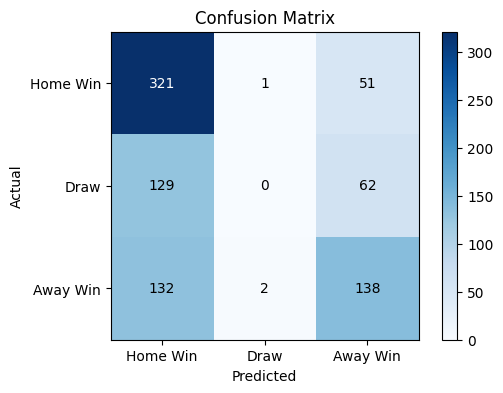

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6, 4))
im = ax.imshow(cm, cmap="Blues")


classes = ["Home Win", "Draw", "Away Win"]
ax.set_xticks(range(len(classes)))
ax.set_yticks(range(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max()/2 else "black")

plt.colorbar(im)
plt.show()
